In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create your connection.
cnx = sqlite3.connect('copy_database.db')

df = pd.read_sql_query("SELECT * FROM properties", cnx)

In [2]:
df.columns

Index(['index', 'project_id', 'condo_street', 'project',
       'condo_market_segment', 'lat', 'long', 'price_per_sqm', 'district',
       'condo_commonest_tenure', 'deprecated_num_malls',
       'deprecated_num_taxi_stands', 'deprecated_num_primary_schools',
       'deprecated_num_mrt', 'deprecated_num_hawker',
       'deprecated_num_carparks', 'deprecated_num_bus_stops',
       'deprecated_num_chas_clinics', 'deprecated_num_sports_facilities',
       'deprecated_num_community_centers', 'deprecated_num_supermarkets',
       'deprecated_num_secondary_schools',
       'deprecated_num_eating_establishments', 'deprecated_num_parks',
       'project_type', 'hdb_avg_floor_area_sqm', 'hdb_avg_resale_price',
       'hdb_postal_code', 'num_clinic', 'feature_ids_clinic', 'quality_clinic',
       'num_community_center', 'feature_ids_community_center',
       'quality_community_center', 'num_gym', 'feature_ids_gym', 'quality_gym',
       'num_hawker_center', 'feature_ids_hawker_center',
       'q

In [37]:
df_small = df[['raw_num_other_public_sports_facility',
       'raw_num_park', 'raw_num_primary_school', 'raw_num_secondary_school',
       'raw_num_supermarket','raw_quality_other_public_sports_facility', 'raw_quality_park',
       'raw_quality_primary_school', 'raw_quality_secondary_school',
       'raw_quality_supermarket']]

In [38]:
df_small.describe()

,raw_num_other_public_sports_facility,raw_num_park,raw_num_primary_school,raw_num_secondary_school,raw_num_supermarket,raw_quality_other_public_sports_facility,raw_quality_park,raw_quality_primary_school,raw_quality_secondary_school,raw_quality_supermarket
count,10614.000000,10614.000000,10614.000000,10614.000000,10614.000000,4338.000000,8151.000000,10099.000000,9345.000000,10558.000000
mean,0.476917,2.245336,2.628321,2.044846,6.126248,4.195497,4.052209,4.262911,4.021736,3.982869
std,0.622594,2.293320,1.521067,1.259980,2.744375,0.059611,0.038638,0.001194,0.121196,0.004558
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.131635,4.037289,4.257803,3.502190,3.969592
25%,0.000000,1.000000,2.000000,1.000000,4.000000,4.165735,4.037970,4.262276,3.960730,3.979835
50%,0.000000,2.000000,2.000000,2.000000,6.000000,4.175513,4.038389,4.262965,4.012442,3.981430
75%,1.000000,3.000000,4.000000,3.000000,8.000000,4.189771,4.043993,4.263691,4.082784,3.984680
max,3.000000,15.000000,9.000000,6.000000,16.000000,4.400000,4.700000,4.266271,4.539615,4.031090


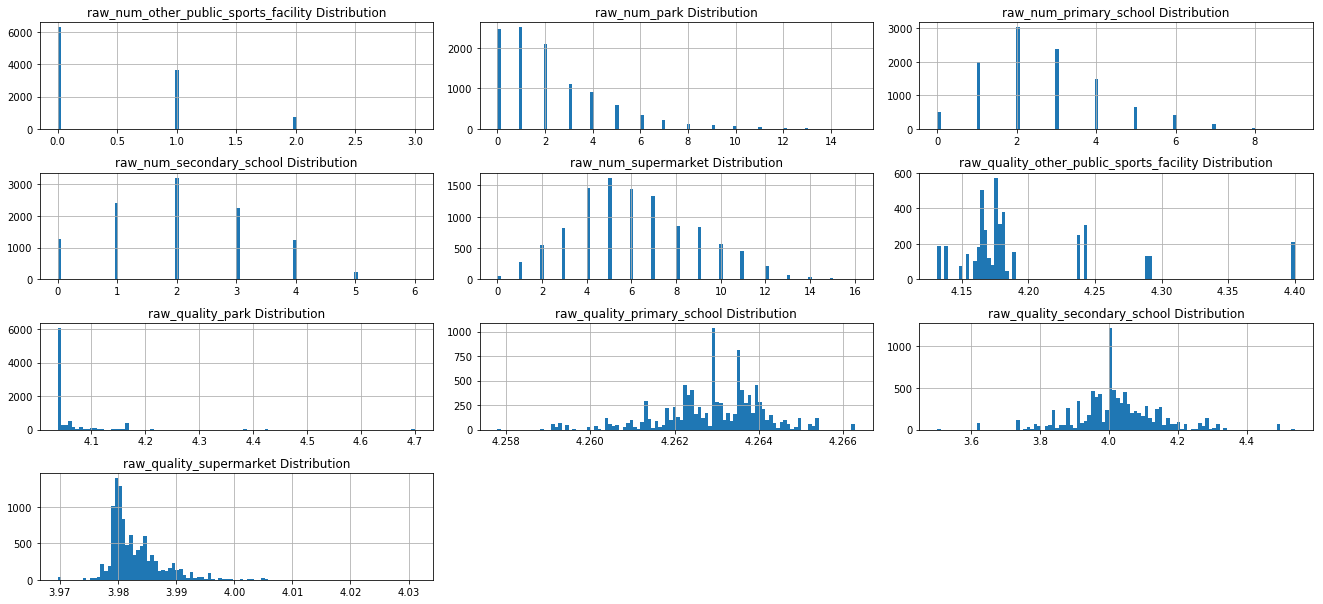

In [39]:


def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    fig.set_size_inches(18.5, 8.5)
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=100,ax=ax)
        ax.set_title(var_name+" Distribution")
    
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

# test = pd.DataFrame(np.random.randn(30, 9), columns=map(str, range(9)))
draw_histograms(df_small, df_small.columns, 4, 3)

In [51]:
bins = [0, 1, 2, 99]
labels = [0, 0.5, 1]
df_small['bin_num_other_public_sports_facility'] = pd.cut(df['raw_num_other_public_sports_facility'], right=False, bins=bins, labels=labels)


bins = [0, 1, 2, 3, 4, 99]
labels = [0, 0.25, 0.5, 0.75, 1]
df_small['bin_num_park'] = pd.cut(df['raw_num_park'], right=False, bins=bins, labels=labels)
df_small['bin_num_primary_school'] = pd.cut(df['raw_num_primary_school'], right=False, bins=bins, labels=labels)
df_small['bin_num_secondary_school'] = pd.cut(df['raw_num_secondary_school'], right=False, bins=bins, labels=labels)


bins = [0, 1, 4, 6, 8, 99]
labels = [0, 0.25, 0.5, 0.75, 1]
df_small['bin_num_supermarket'] = pd.cut(df['raw_num_supermarket'], right=False, bins=bins, labels=labels)
# 'raw_num_other_public_sports_facility'	1, >=2
# 'raw_num_park'	1,2,3,>=4
# 'raw_num_primary_school'	1,2,3,>=4
# 'raw_num_secondary_school'	1,2,3,>=4
# 'raw_num_supermarket'	1-3,4-5,6-7,>=8

df_small
# df_small[df_small['raw_num_other_public_sports_facility'] == 2]


C:\Users\daosh\Anaconda3\envs\ml4t\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\daosh\Anaconda3\envs\ml4t\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\daosh\Anaconda3\envs\ml4t\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,raw_num_other_public_sports_facility,raw_num_park,raw_num_primary_school,raw_num_secondary_school,raw_num_supermarket,raw_quality_other_public_sports_facility,raw_quality_park,raw_quality_primary_school,raw_quality_secondary_school,raw_quality_supermarket,bin_num_other_public_sports_facility,bin_num_park,bin_num_primary_school,bin_num_secondary_school,bin_num_supermarket
0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,3.981268,0.0,0.00,0.00,0.00,0.25
1,1.0,1.0,1.0,4.0,6.0,4.180695,4.044473,4.263577,4.004608,3.983223,0.5,0.25,0.25,1.00,0.75
2,0.0,3.0,2.0,1.0,8.0,NaN,4.038773,4.263294,3.878009,3.980127,0.0,0.75,0.50,0.25,1.00
3,1.0,4.0,1.0,0.0,12.0,4.183965,4.038042,4.262950,NaN,3.986791,0.5,1.00,0.25,0.00,1.00
4,0.0,0.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,3.981268,0.0,0.00,0.00,0.00,0.25
5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.00,0.00
6,0.0,7.0,0.0,0.0,10.0,NaN,4.038625,NaN,NaN,3.980616,0.0,1.00,0.00,0.00,1.00
7,0.0,2.0,1.0,0.0,9.0,NaN,4.103965,4.264926,NaN,3.982340,0.0,0.50,0.25,0.00,1.00
8,0.0,0.0,1.0,0.0,3.0,NaN,NaN,4.263885,NaN,3.997769,0.0,0.00,0.25,0.00,0.25
9,0.0,5.0,0.0,0.0,10.0,NaN,4.038625,NaN,NaN,3.981207,0.0,1.00,0.00,0.00,1.00


In [17]:
df_stats =  df_small.describe()
df_stats

,raw_num_other_public_sports_facility,raw_num_park,raw_num_primary_school,raw_num_secondary_school,raw_num_supermarket,raw_quality_other_public_sports_facility,raw_quality_park,raw_quality_primary_school,raw_quality_secondary_school,raw_quality_supermarket
count,10614.000000,10614.000000,10614.000000,10614.000000,10614.000000,4338.000000,8151.000000,10099.000000,9345.000000,10558.000000
mean,0.476917,2.245336,2.628321,2.044846,6.126248,4.195497,4.052209,4.262911,4.021736,3.982869
std,0.622594,2.293320,1.521067,1.259980,2.744375,0.059611,0.038638,0.001194,0.121196,0.004558
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.131635,4.037289,4.257803,3.502190,3.969592
25%,0.000000,1.000000,2.000000,1.000000,4.000000,4.165735,4.037970,4.262276,3.960730,3.979835
50%,0.000000,2.000000,2.000000,2.000000,6.000000,4.175513,4.038389,4.262965,4.012442,3.981430
75%,1.000000,3.000000,4.000000,3.000000,8.000000,4.189771,4.043993,4.263691,4.082784,3.984680
max,3.000000,15.000000,9.000000,6.000000,16.000000,4.400000,4.700000,4.266271,4.539615,4.031090


In [23]:
df[['raw_num_other_public_sports_facility','num_other_public_sports_facility','raw_quality_other_public_sports_facility', 'quality_other_public_sports_facility', 
       'raw_num_park','num_park', 'raw_quality_park', 'quality_park', 
       'raw_num_primary_school', 'num_primary_school', 'raw_quality_primary_school', 'quality_primary_school', 
       'raw_num_secondary_school','num_secondary_school', 'raw_quality_secondary_school', 'quality_secondary_school',
       'raw_num_supermarket','num_supermarket', 'raw_quality_supermarket', 'quality_supermarket']]


,raw_num_other_public_sports_facility,num_other_public_sports_facility,raw_quality_other_public_sports_facility,quality_other_public_sports_facility,raw_num_park,num_park,raw_quality_park,quality_park,raw_num_primary_school,num_primary_school,raw_quality_primary_school,quality_primary_school,raw_num_secondary_school,num_secondary_school,raw_quality_secondary_school,quality_secondary_school,raw_num_supermarket,num_supermarket,raw_quality_supermarket,quality_supermarket
0,0.0,0.0,NaN,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0,2.0,0.25,3.981268,1.0
1,1.0,1.0,4.180695,1.0,1.0,0.25,4.044473,1.0,1.0,0.25,4.263577,1.0,4.0,1.00,4.004608,1.0,6.0,0.50,3.983223,1.0
2,0.0,0.0,NaN,1.0,3.0,1.00,4.038773,1.0,2.0,0.25,4.263294,1.0,1.0,0.25,3.878009,1.0,8.0,1.00,3.980127,1.0
3,1.0,1.0,4.183965,1.0,4.0,1.00,4.038042,1.0,1.0,0.25,4.262950,1.0,0.0,0.00,NaN,1.0,12.0,1.00,3.986791,1.0
4,0.0,0.0,NaN,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0,2.0,0.25,3.981268,1.0
5,0.0,0.0,NaN,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0
6,0.0,0.0,NaN,1.0,7.0,1.00,4.038625,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0,10.0,1.00,3.980616,1.0
7,0.0,0.0,NaN,1.0,2.0,0.50,4.103965,1.0,1.0,0.25,4.264926,1.0,0.0,0.00,NaN,1.0,9.0,1.00,3.982340,1.0
8,0.0,0.0,NaN,1.0,0.0,0.00,NaN,1.0,1.0,0.25,4.263885,1.0,0.0,0.00,NaN,1.0,3.0,0.25,3.997769,1.0
9,0.0,0.0,NaN,1.0,5.0,1.00,4.038625,1.0,0.0,0.00,NaN,1.0,0.0,0.00,NaN,1.0,10.0,1.00,3.981207,1.0
